# Figure 3h. Distribution of the number of CoSs per gene.

Distribution of the number of CoS per gene; only 0.8% genes harbor more than four colocalized sets. 

In [2]:
library(tidyverse)
library(ggpattern)
library(ggpubr)
library(cowplot)
res <- readRDS("data/xQTL_only_colocalization.rds")

## Organize input data

In [3]:
# -- check >1 causal genes
causal_numbers <- table(unlist(res$gene))
table_causal <- table(causal_numbers)
data <- data.frame(causal_numbers = as.numeric(table_causal),
                   categories = names(table_causal))
data$proportion <- data$causal_numbers / sum(data$causal_numbers)
data <- data[1:4,]
data <- rbind(data, c(90, ">5", 1-sum(data$proportion)))
data$proportion <- as.numeric(data$proportion)
data$causal_numbers <- as.numeric(data$causal_numbers)
data$categories <- factor(data$categories, levels = c("1", "2", "3", "4", ">5"))

## Distribution plot

In [4]:
library(ggplot2)
library(ggsci)
color <- c(pal_npg()(10), pal_d3()(10))
p1 <- ggplot(data, aes(x = categories, y = causal_numbers, fill = categories)) +
  geom_bar(stat = "identity") +
  scale_color_npg() +
  labs(
    title = "",
    x = "Number of CoS per gene",
    y = "Number of genes"
  ) +
  theme_minimal(base_size = 15) + # Use a minimal theme with a larger base font size
  theme(
    plot.title = element_text( size = 0 ),
    axis.title.x = element_text( margin = margin(t = 5), size = 24), # Adjust x axis title margin
    axis.title.y = element_text(margin = margin(r = 10), size = 24), # Adjust y axis title margin
    axis.text.x = element_text(margin = margin(t = 5), size = 18), # Adjust x axis text margin
    axis.text.y = element_text(margin = margin(r = 5), size = 18, angle = 90), # Adjust y axis text margin
    legend.position = "none",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5)
  )

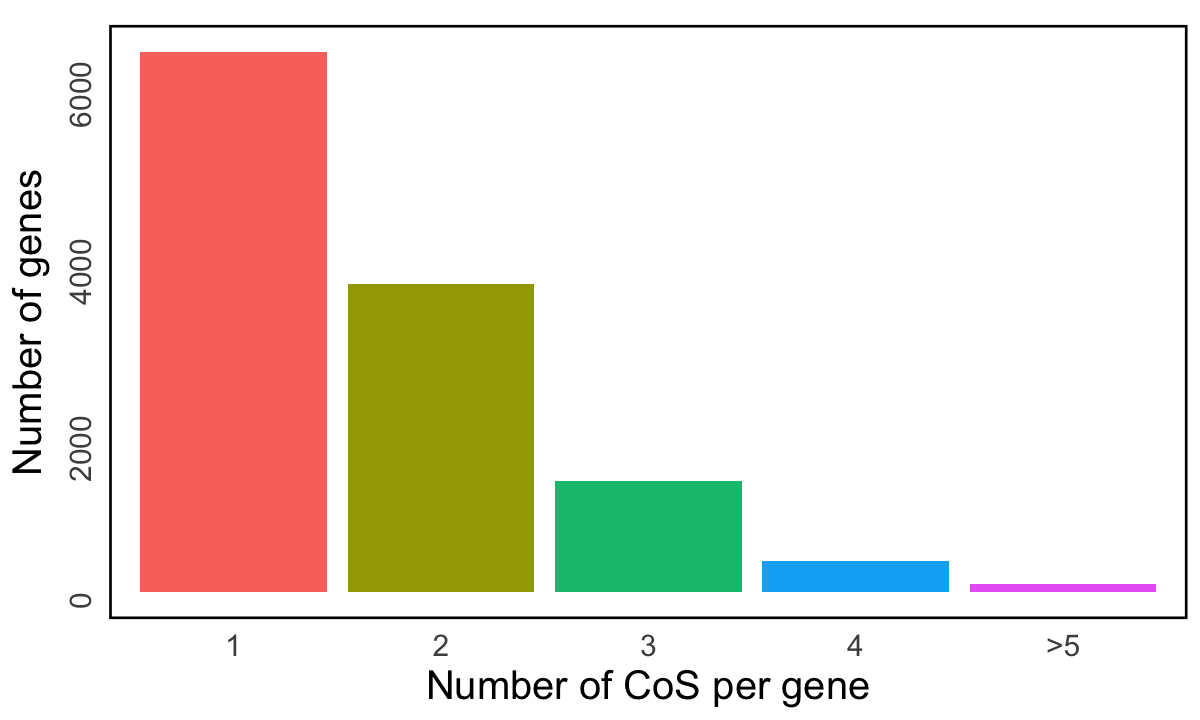

In [5]:
options(repr.plot.width = 10, repr.plot.height = 6)
p1